In [1]:
# import libraries
import numpy as np # arrays, array operations
import pandas as pd # working with data structures
import scipy.stats as stats
import math
#import io # import/output files
#from google.colab import files
import matplotlib.pyplot as plt # plot graphs


98% Confidence Interval = (185.0 , 211.0)


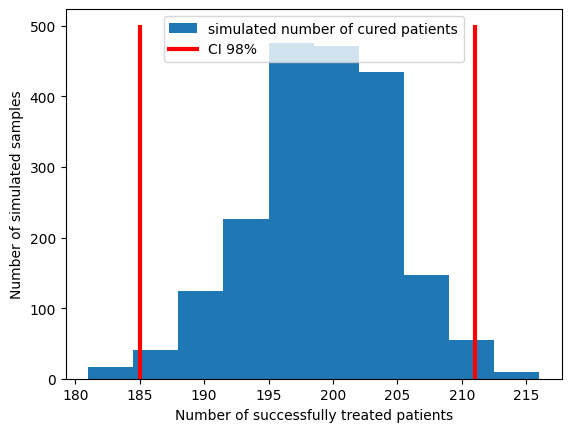

In [8]:
# example 1
# binomial distribution Bino(N=234, p=0.85)

# method - parametric bootstrap
# generate 2000 samples from distribution

num_samples = 2000
conf = 0.98

samples_num_cured = np.random.binomial(234,0.85,size = (num_samples,))
ci98 = np.percentile(samples_num_cured, [100*(1-conf)/2,100*(1-(1-conf)/2)])
# ci98 = np.percentile(samples_num_cured, [1,99])

print('98% Confidence Interval = (' + str(ci98[0]) + ' , ' + str(ci98[1]) + ')') 

plt.hist(samples_num_cured, label = 'simulated number of cured patients')
plt.plot([ci98,ci98], plt.gca().get_ylim(),color = 'red', lw = 3, label = 'CI 98%')
plt.xlabel('Number of successfully treated patients')
plt.ylabel('Number of simulated samples')
handles, labels = plt.gca().get_legend_handles_labels()
handles.pop(2) , labels.pop(2)
plt.legend(handles, labels)
plt.show()


98% Confidence Interval = (186.0 , 211.0)


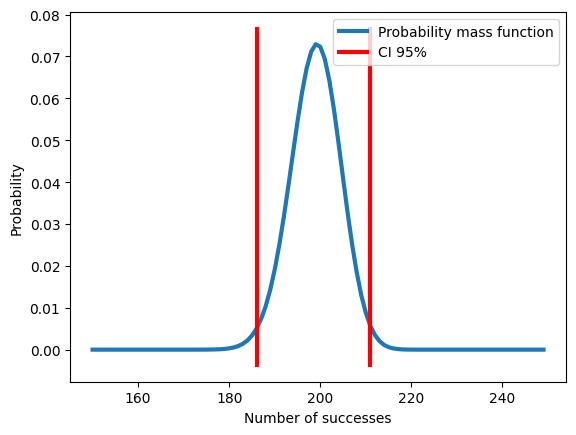

In [9]:
 # example 1
 # method - parametric CI

ci98_2 = stats.binom.ppf([0.01,0.99],234,0.85)

print('98% Confidence Interval = (' + str(ci98_2[0]) + ' , ' + str(ci98_2[1]) + ')') 

binom_pdf_x = np.arange(150,250)
binom_pdf_y = stats.binom.pmf(binom_pdf_x,234,0.85)

plt.plot(binom_pdf_x,binom_pdf_y, lw=3, label='Probability mass function')
plt.plot([ci98_2,ci98_2], plt.gca().get_ylim(),color = 'red', lw = 3, label = 'CI 95%')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
handles, labels = plt.gca().get_legend_handles_labels()
handles.pop(2) , labels.pop(2)
plt.legend(handles, labels)
plt.show()

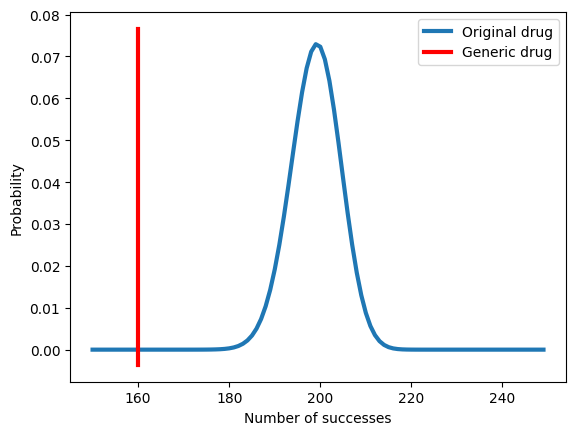

probability = 1.266103410313287e-10


In [48]:
# example 1 part b 
# compare distribution to number
# what is the probability of getting a number (or more extreme) under certain distribution?

p_160 = stats.binom.cdf(160,234,0.85)

plt.plot(binom_pdf_x,binom_pdf_y, lw=3, label='Original drug')
plt.plot([160,160], plt.gca().get_ylim(),color = 'red', lw = 3, label = 'Generic drug')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.legend(loc = 'upper right')
plt.show()

print('probability = {}'.format(p_160)) 

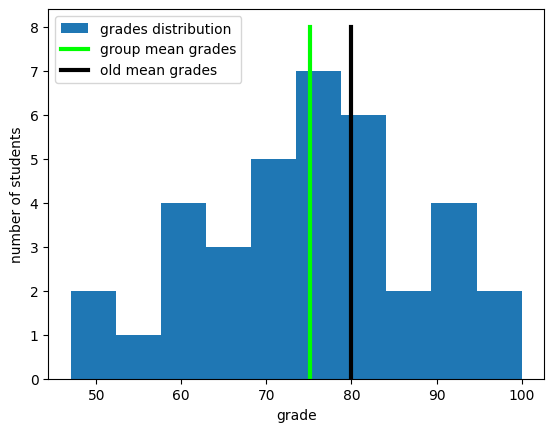

In [49]:
# example 2
# compare group to number

grades = np.array([73,74,82,78,70,66,99,80,92,79,60,62,91,74,56,75,79,83,82,
          68,90,61,71,100,52,69,77,58,90,89,77,47,68,69,87,77])

grades_mean = grades.mean()

plt.hist(grades, label = 'grades distribution')
plt.plot([grades_mean,grades_mean], [0,8], color='lime', lw=3, label = 'group mean grades')
plt.plot([80,80], [0,8], color='black', lw=3, label = 'old mean grades')
plt.xlabel('grade')
plt.ylabel('number of students')
plt.legend()
plt.show()


In [50]:
# find 95% CI with t-distribution

grades_mean = grades.mean()
N = len(grades)
grades_se = grades.std(ddof=1)/N**0.5
t_ci95 = stats.t.ppf([0.025,0.975],N-1)

CI95 = grades_mean+grades_se*t_ci95

print('grades mean = ' + str(round(grades_mean,2)))
print('N = ' + str(round(N,2)))
print('grades se = ' + str(round(grades_se,2)))
print('t statistic = ' + str(t_ci95.round(2)))
print('CI 95% = ' + str(CI95.round(2)))

grades mean = 75.14
N = 36
grades se = 2.11
t statistic = [-2.03  2.03]
CI 95% = [70.85 79.43]


In [59]:
# effect size of comparison group to value

t_stat = (grades_mean-80)/grades_se
p_value = 1-stats.t.cdf(abs(t_stat),N-1)
print('Significance: p-value = ' + str(round(p_value,4)))


effect_size = (grades_mean-80)/grades.std(ddof=1)
print('Effect Size = ' + str(round(effect_size,4)))


Significance: p-value = 0.0138
Effect Size = -0.3834


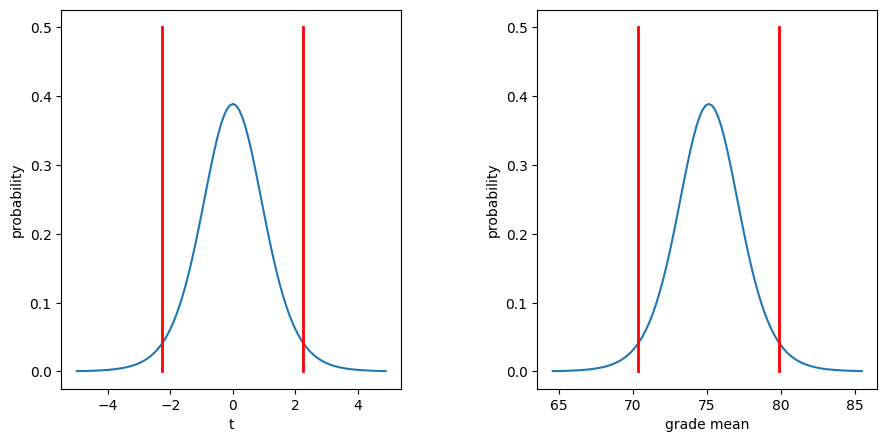

In [32]:
# convertion from t-distribution to sample distribution demonstration

t_x = np.arange(-5,5,0.1)
t_pdf = stats.t.pdf(t_x, N-1)
t_CI = stats.t.ppf([0.025,0.975], N-1)

fig, ax = plt.subplots(1,2)
ax[0].plot(t_x,t_pdf)
ax[0].plot([t_CI,t_CI], [0,0.5], color = 'red', lw = 2)
ax[0].set_xlabel('t')
ax[0].set_ylabel('probability')

grade_probability = t_x*grades_se+grades_mean
grade_CI = t_CI*grades_se+grades_mean
 
ax[1].plot(grade_probability,t_pdf)
ax[1].plot([grade_CI,grade_CI], [0,0.5], color = 'red', lw = 2)
ax[1].set_xlabel('grade mean')
ax[1].set_ylabel('probability')

fig.subplots_adjust( right=1.4, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

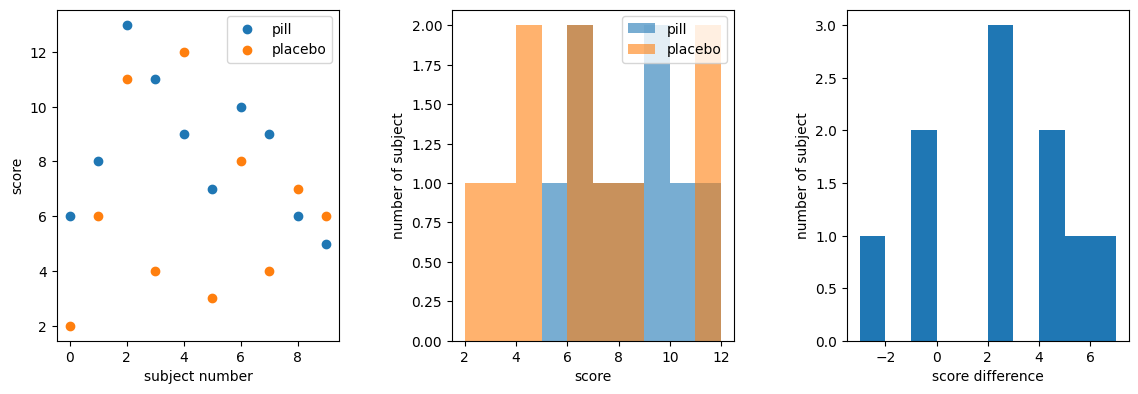

In [61]:
# example 3

# 2 groups same subjects

pill = np.array([6,8,13,11,9,7,10,9,6,5])
placebo = np.array([2,6,11,4,12,3,8,4,7,6])

N = len(pill)

fig, ax = plt.subplots(1,3)

ax[0].scatter(np.array(range(N)),pill, label = 'pill')
ax[0].scatter(np.array(range(N)),placebo, label = 'placebo')
ax[0].legend(loc = 'upper right')
ax[0].set_xlabel('subject number')
ax[0].set_ylabel('score')

ax[1].hist(pill, bins = np.arange(2,13), alpha = 0.6, label = 'pill')
ax[1].hist(placebo, bins = np.arange(2,13), alpha = 0.6, label = 'placebo')
ax[1].legend(loc = 'upper right')
ax[1].set_xlabel('score')
ax[1].set_ylabel('number of subject')

score_difference = pill-placebo

ax[2].hist(score_difference)
ax[2].set_xlabel('score difference')
ax[2].set_ylabel('number of subject')

fig.subplots_adjust( right=1.8, top=0.8, wspace=0.4, hspace=0.4)
plt.show()


In [62]:
# find 95% CI with t-distribution

diff_mean = score_difference.mean()
diff_se = score_difference.std(ddof=1)/N**0.5

CI95 = diff_mean + diff_se*stats.t.ppf([0.025,0.975], N-1)

print('CI 95% = ' + str(CI95.round(4)))

t_stat = diff_mean/diff_se
p_value = 1-stats.t.cdf(abs(t_stat),N-1)
print('Significance: p-value = ' + str(round(p_value,4)))



CI 95% = [-0.0971  4.2971]
Significance: p-value = 0.0294


In [64]:
# same example but different students in two groups

pill_N = len(pill)
pill_var = pill.var(ddof=1)

placebo_N = len(placebo)
placebo_var = placebo.var(ddof=1)

combined_se = (pill_var/pill_N + placebo_var/placebo_N)**0.5

CI95_2 = diff_mean + combined_se*stats.t.ppf([0.025,0.975], pill_N+placebo_N-2)

print('CI 95% = ' + str(CI95_2.round(4)))

t_stat = diff_mean/combined_se
p_value = 1-stats.t.cdf(abs(t_stat),N-1)
print('Significance: p-value = ' + str(round(p_value,4)))


CI 95% = [-0.6527  4.8527]
Significance: p-value = 0.0717


In [65]:
# effect size for difference

# paired case
effect_size1 = diff_mean/score_difference.std(ddof=1)

print('Effect Size = ' + str(effect_size1.round(4)))

# unpaired case
combined_sd = np.sqrt(((pill_N-1)*pill_var + (placebo_N-1)*placebo_var)/(pill_N+placebo_N-2))

effect_size2 = (pill.mean()-placebo.mean())/combined_sd

print('Effect Size = ' + str(effect_size2.round(4)))


Effect Size = 0.6837
Effect Size = 0.7168


In [67]:
# example 4

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/brain_mouse.csv'

data = pd.read_csv(url)

print(data)


    interactions genotype
0             23     Plus
1             15     Plus
2             15     Plus
3             19     Plus
4             20     Plus
5             25     Plus
6             16     Plus
7             26     Plus
8             17     Plus
9             22     Plus
10            17     Plus
11            21     Plus
12             5     Plus
13            12     Plus
14            11     Plus
15            11     Plus
16            19     Plus
17            15     Plus
18            24     Plus
19             2    Minus
20            15    Minus
21            12    Minus
22            16    Minus
23            16    Minus
24            11    Minus
25            11    Minus
26            15    Minus
27            11    Minus
28            18    Minus


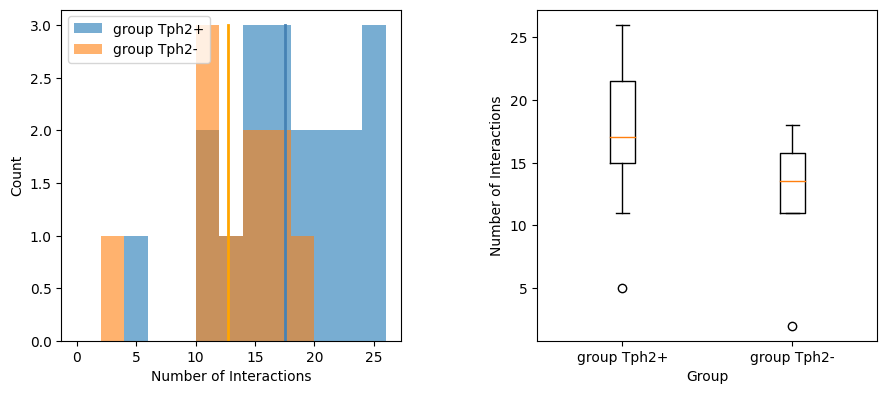

In [68]:
# presentation

plus_group = data.interactions[data.genotype=='Plus']
minus_group = data.interactions[data.genotype=='Minus']

mean_plus_group = plus_group.mean()
mean_minus_group = minus_group.mean()

fig,ax = plt.subplots(1,2)
ax[0].hist(plus_group, bins = np.arange(0,28,2), alpha = 0.6, label = 'group Tph2+')
ax[0].plot([mean_plus_group,mean_plus_group] , [0,3], color='steelblue', lw=2)
ax[0].hist(minus_group, bins = np.arange(0,28,2), alpha = 0.6, label = 'group Tph2-')
ax[0].plot([mean_minus_group,mean_minus_group] , [0,3], color='orange', lw=2)
ax[0].set_xlabel('Number of Interactions')
ax[0].set_ylabel('Count')
ax[0].legend()

ax[1].boxplot([plus_group,minus_group], labels = ['group Tph2+','group Tph2-'])
ax[1].set_xlabel('Group')
ax[1].set_ylabel('Number of Interactions')

fig.subplots_adjust( right=1.4, top=0.8, wspace=0.4, hspace=0.4)
plt.show()


acceptance region = [ -4.18, 4.37 ]


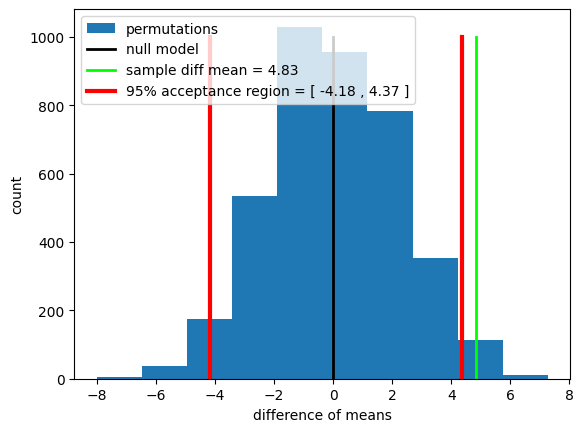

p value = 0.0168


In [70]:
# permutations

both_groups = np.array(data.interactions)

num_perms = 4000
perm_groups = np.zeros((len(both_groups),num_perms))
for i in range(num_perms):
  perm_groups[:,i] = np.random.choice(both_groups, len(both_groups), replace=False)

perm_plus_group = perm_groups[data.genotype=='Plus',:]
perm_minus_group = perm_groups[data.genotype=='Minus',:]

mean_perm_plus_group = perm_plus_group.mean(axis=0)
mean_perm_minus_group = perm_minus_group.mean(axis=0)

mean_diff_perm = mean_perm_plus_group-mean_perm_minus_group

conf=0.95
ar95 = np.percentile(mean_diff_perm, [100*(1-conf)/2,100*(1-(1-conf)/2)])
print('acceptance region = [ {}, {} ]'.format(round(ar95[0],2),round(ar95[1],2)) )

mean_diff_sample = mean_plus_group-mean_minus_group

plt.hist(mean_diff_perm, label = 'permutations')
plt.plot([0,0], [0,1000], color = 'black', lw=2, label = 'null model')
plt.plot([mean_diff_sample,mean_diff_sample], [0,1000], color = 'lime', lw=2, 
         label = 'sample diff mean = {}'.format(round(mean_diff_sample,2)))
plt.plot([ar95,ar95], [0,1000],color = 'red', lw = 3, 
         label = '95% acceptance region = [ {} , {} ]'.format(round(ar95[0],2),round(ar95[1],2)) )
plt.xlabel('difference of means')
plt.ylabel('count')
handles, labels = plt.gca().get_legend_handles_labels()
handles.pop(3) , labels.pop(3)
plt.legend(handles, labels, loc = 'upper left')
plt.show()

num_more = sum(mean_diff_perm>=mean_diff_sample)
p_value = num_more/num_perms
print('p value = {}'.format(round(p_value,4)))

confidence interval = [ 1.42, 8.54 ]


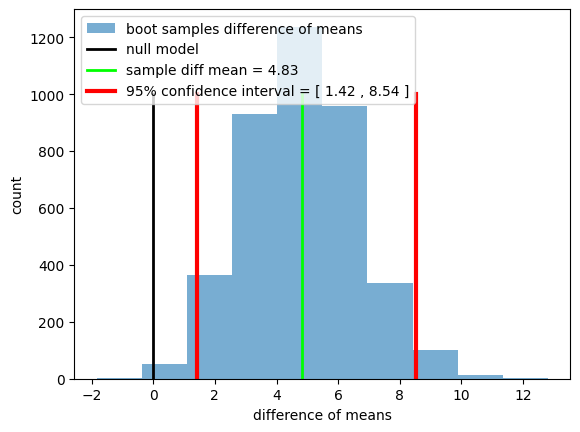

p value = 0.002


In [71]:
# regular bootstrap + 95% CI

num_boots = 4000
boot_plus_group = np.random.choice(plus_group, size = (len(plus_group),num_boots))
boot_minus_group = np.random.choice(minus_group, size = (len(minus_group),num_boots))

boot_plus_group_means = boot_plus_group.mean(axis = 0)
boot_minus_group_means = boot_minus_group.mean(axis = 0)

mean_diff_boot = boot_plus_group_means-boot_minus_group_means

conf=0.95
ci95 = np.percentile(mean_diff_boot, [100*(1-conf)/2,100*(1-(1-conf)/2)])
print('confidence interval = [ {}, {} ]'.format(round(ci95[0],2),round(ci95[1],2)) )

plt.hist(mean_diff_boot, alpha = 0.6, label = 'boot samples difference of means')
plt.plot([0,0], [0,1000], color = 'black', lw=2, label = 'null model')
plt.plot([mean_diff_sample,mean_diff_sample], [0,1000], color = 'lime', lw=2, 
         label = 'sample diff mean = {}'.format(round(mean_diff_sample,2)))
plt.plot([ci95,ci95], [0,1000],color = 'red', lw = 3, 
         label = '95% confidence interval = [ {} , {} ]'.format(round(ci95[0],2),round(ci95[1],2)) )
plt.xlabel('difference of means')
plt.ylabel('count')
handles, labels = plt.gca().get_legend_handles_labels()
handles.pop(3) , labels.pop(3)
plt.legend(handles, labels, loc = 'upper left')
plt.show()

num_less = sum(mean_diff_boot<=0)
p_value = num_less/num_boots
print('p value = {}'.format(round(p_value,4)))

In [75]:
# parametric confidence interval 
# t distribution

plus_group_N = len(plus_group)
plus_group_var = plus_group.var(ddof=1)

minus_group_N = len(minus_group)
minus_group_var = minus_group.var(ddof=1)

combined_se = (plus_group_var/plus_group_N + minus_group_var/minus_group_N)**0.5

ci95 = mean_diff_sample + combined_se*stats.t.ppf([0.025,0.975], plus_group_N+minus_group_N-2)

print('95% confidence interval = [ {} , {} ]'.format(round(ci95[0],2),round(ci95[1],2)))

t_stat = mean_diff_sample/combined_se
p_value = 1-stats.t.cdf(abs(t_stat), plus_group_N+minus_group_N-2)

print('p value = {}'.format(round(p_value,4)))


95% confidence interval = [ 0.93 , 8.73 ]
p value = 0.0086


In [76]:
# effext size

combined_sd = np.sqrt(((plus_group_N-1)*plus_group_var + (minus_group_N-1)*minus_group_var)/(plus_group_N+minus_group_N-2))

effect_size = (mean_plus_group-mean_minus_group)/combined_sd

print('Effect Size = ' + str(effect_size.round(4)))

Effect Size = 0.9341
